In [3]:
import pandas as pd
import numpy as np

In [4]:
# data = pd.read_csv("/home/shin/Dropbox/CV/Accepted/20180822_Optiopay/test/OptioPay Analytics Challenge_Dataset.csv", delimiter=";")
# data = pd.read_csv("C:\\Users\\shinj\\Dropbox\\CV\\Accepted\\20180822_Optiopay\\test\\OptioPay Analytics Challenge_Dataset.csv", delimiter=";")
data = pd.read_csv("/media/shin/OS/Documents and Settings/shinj/Dropbox/CV/Accepted/20180822_Optiopay/test/OptioPay Analytics Challenge_Dataset.csv", delimiter=";")

In [5]:
data.columns

Index(['PJ_ID', 'pj_created_at', 'recipient_details_gender', 'mpj',
       'first_device', 'first_os', 'first_browser', 'first_city',
       'last_device', 'summarized_last_device', 'last_os', 'last_browser',
       'last_city', 'video_viewed', 'campaign_viewed', 'outcome', 'conversion',
       'num_campaign_pages_looked', 'num_campaigns_looked', 'Closed',
       'site visit', 'PJ count'],
      dtype='object')

In [6]:
data.describe()

,video_viewed,campaign_viewed,conversion,num_campaign_pages_looked,num_campaigns_looked,Closed,site visit,PJ count
count,226.0,2126.0,14033.000000,14033.000000,14033.000000,8583.0,14033.000000,14033.0
mean,1.0,1.0,0.040619,0.441459,0.306777,1.0,0.692297,1.0
std,0.0,0.0,0.197412,1.664236,1.013743,0.0,0.461559,0.0
min,1.0,1.0,0.000000,0.000000,0.000000,1.0,0.000000,1.0
25%,1.0,1.0,0.000000,0.000000,0.000000,1.0,0.000000,1.0
50%,1.0,1.0,0.000000,0.000000,0.000000,1.0,1.000000,1.0
75%,1.0,1.0,0.000000,0.000000,0.000000,1.0,1.000000,1.0
max,1.0,1.0,1.000000,31.000000,19.000000,1.0,1.000000,1.0


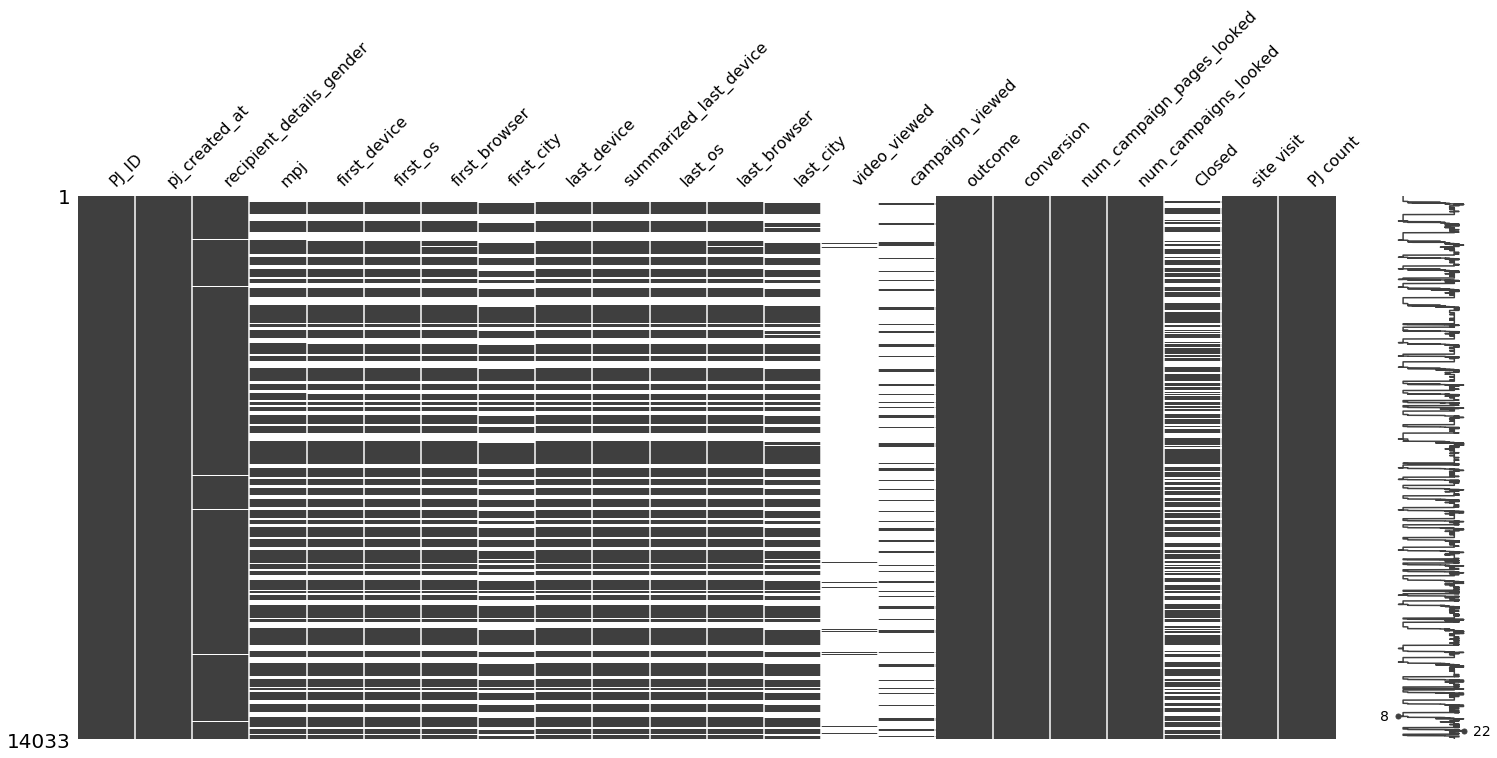

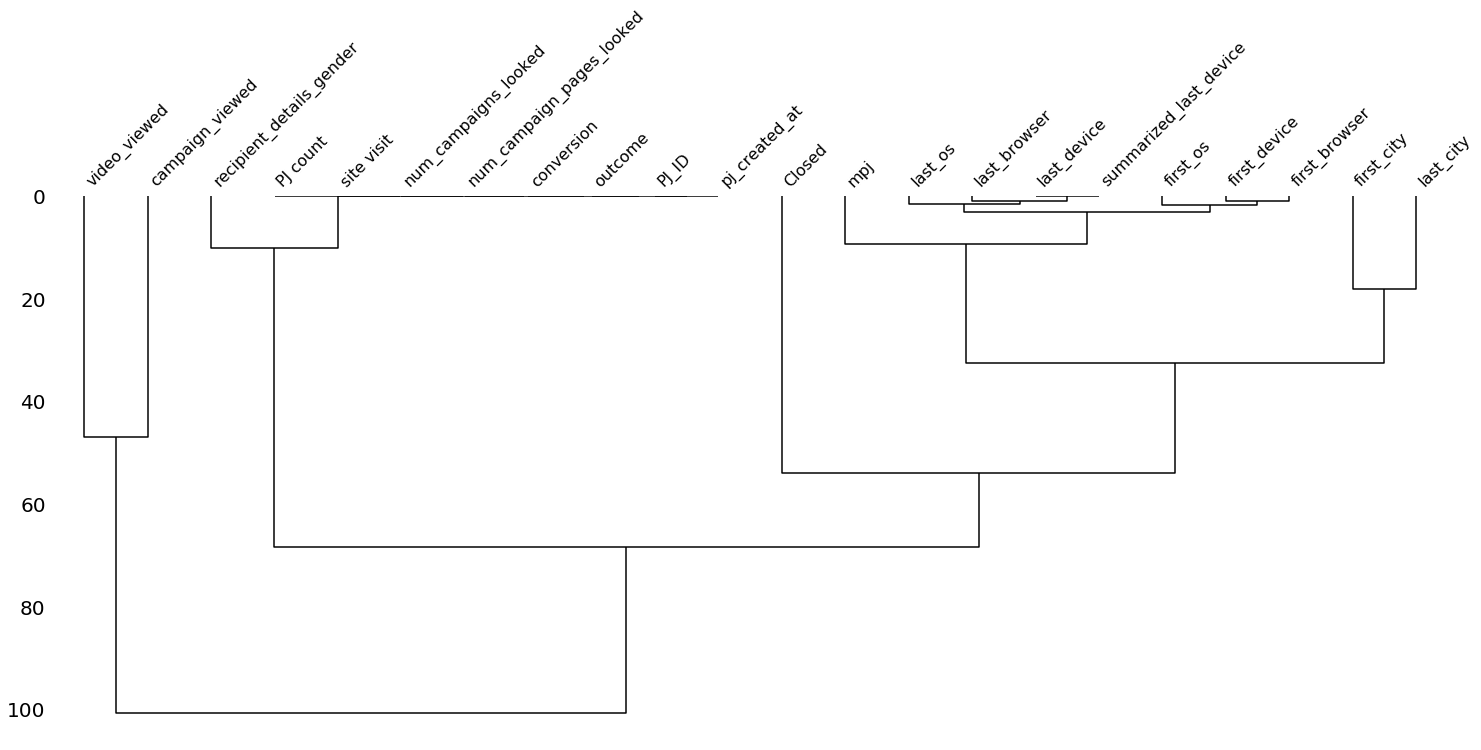

In [8]:
#data Overview
import missingno as msno
msno.matrix(data)
msno.dendrogram(data)

In [11]:
#No of missing data
data.isnull().sum()

PJ_ID                            0
pj_created_at                    0
recipient_details_gender       102
mpj                           4318
first_device                  4412
first_os                      4415
first_browser                 4413
first_city                    5502
last_device                   4403
summarized_last_device        4403
last_os                       4405
last_browser                  4404
last_city                     5411
video_viewed                 13807
campaign_viewed              11907
outcome                          0
conversion                       0
num_campaign_pages_looked        0
num_campaigns_looked             0
Closed                        5450
site visit                       0
PJ count                         0
dtype: int64

In [10]:
numeric_data = data.copy()

In [11]:
# Fill Nan value for binary columns: fill 0 for nan values because there are only 1s in the original data
numeric_data['campaign_viewed'] = numeric_data['campaign_viewed'].fillna(0)
numeric_data['video_viewed'] = numeric_data['video_viewed'].fillna(0)
numeric_data['Closed'] = numeric_data['Closed'].fillna(0)
# For mpj column, convert all non Nan data to 1 because any Nan value means a customer clicked a link
numeric_data.mpj.loc[~numeric_data.mpj.isnull()] = 1
numeric_data['mpj'] = numeric_data['mpj'].fillna(0)

/home/shin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
numeric_data.isnull().sum()

PJ_ID                           0
pj_created_at                   0
recipient_details_gender      102
mpj                             0
first_device                 4412
first_os                     4415
first_browser                4413
first_city                   5502
last_device                  4403
summarized_last_device       4403
last_os                      4405
last_browser                 4404
last_city                    5411
video_viewed                    0
campaign_viewed                 0
outcome                         0
conversion                      0
num_campaign_pages_looked       0
num_campaigns_looked            0
Closed                          0
site visit                      0
PJ count                        0
dtype: int64

In [13]:
#Fill 0 for all nan value to label-encode
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
category_data = ['recipient_details_gender', 'first_device', 'first_os', 'first_browser', 'first_city',
       'last_device', 'summarized_last_device', 'last_os', 'last_browser','last_city', 'outcome']
for i in category_data:
    numeric_data[i] = numeric_data[i].fillna(0)

In [14]:
numeric_data.isnull().sum()

PJ_ID                        0
pj_created_at                0
recipient_details_gender     0
mpj                          0
first_device                 0
first_os                     0
first_browser                0
first_city                   0
last_device                  0
summarized_last_device       0
last_os                      0
last_browser                 0
last_city                    0
video_viewed                 0
campaign_viewed              0
outcome                      0
conversion                   0
num_campaign_pages_looked    0
num_campaigns_looked         0
Closed                       0
site visit                   0
PJ count                     0
dtype: int64

In [15]:
#Label encoder for Categorical data
def numeric_encoder(transform_name):
    feature = numeric_data[transform_name]
    label_encoder = preprocessing.LabelEncoder()
    label = numeric_data[transform_name].unique().tolist()
    label_encoder.fit(label)
    for i, item in enumerate(label_encoder.classes_):
        print(item, '-->', i)
    encoded = label_encoder.transform(list(feature))
    numeric_data[transform_name] = encoded.tolist() 

In [16]:
numeric_encoder('recipient_details_gender')

0 --> 0
Female --> 1
Male --> 2


In [17]:
numeric_encoder('first_device')

0 --> 0
Android --> 1
Desktop --> 2
Windows Phone --> 3
iPad --> 4
iPhone --> 5
iPod Touch --> 6


In [18]:
numeric_encoder('last_device')

0 --> 0
Android --> 1
Desktop --> 2
Windows Phone --> 3
iPad --> 4
iPhone --> 5


In [19]:
numeric_encoder('first_os')

0 --> 0
Android --> 1
Linux --> 2
Mac OS X --> 3
Windows --> 4
Windows Phone --> 5
iOS --> 6


In [20]:
numeric_encoder('last_os')

0 --> 0
Android --> 1
Linux --> 2
Mac OS X --> 3
Windows --> 4
Windows Phone --> 5
iOS --> 6


In [21]:
numeric_encoder('first_browser')

0 --> 0
Android Mobile --> 1
Chrome --> 2
Chrome iOS --> 3
Firefox --> 4
Firefox iOS --> 5
Internet Explorer --> 6
Internet Explorer Mobile --> 7
Microsoft Edge --> 8
Mobile Safari --> 9
Mozilla --> 10
Opera --> 11
Safari --> 12


In [22]:
numeric_encoder('last_browser')

0 --> 0
Android Mobile --> 1
Chrome --> 2
Chrome iOS --> 3
Firefox --> 4
Firefox iOS --> 5
Internet Explorer --> 6
Internet Explorer Mobile --> 7
Microsoft Edge --> 8
Mobile Safari --> 9
Mozilla --> 10
Opera --> 11
Safari --> 12


In [23]:
#Label encoding for outcome
data_outcome = data.outcome.tolist()
new_outcome = []
for i in range(len(data)):
    if data_outcome[i] ==  'Fallback':
        new_outcome.append(0)
    elif data_outcome[i] == 'Payout':
        new_outcome.append(1)
    elif data_outcome[i] == 'Combination':
        new_outcome.append(2)
    elif data_outcome[i] == 'Voucher':
        new_outcome.append(3) 
numeric_data.outcome = new_outcome

In [24]:
numeric_encoder('summarized_last_device')

0 --> 0
Desktop --> 1
Mobile --> 2


In [25]:
#City name label encoding
def city_encoder():
    feature1 = numeric_data['first_city']
    feature2 = numeric_data['last_city']
    label_encoder = preprocessing.LabelEncoder()
    label = numeric_data.first_city.append(numeric_data.last_city).unique().tolist()
    label_encoder.fit(label)
    for i, item in enumerate(label_encoder.classes_):
        print(item, '-->', i)
    encoded1 = label_encoder.transform(list(feature1))
    encoded2 = label_encoder.transform(list(feature2))
    numeric_data['first_city'] = encoded1.tolist() 
    numeric_data['last_city'] = encoded2.tolist()

In [26]:
city_encoder()

0 --> 0
Aachen --> 1
Aalen --> 2
Abenberg --> 3
Abtsgmuend --> 4
Abu Dhabi --> 5
Achern --> 6
Achim --> 7
Adelebsen --> 8
Adelsheim --> 9
Adelshofen --> 10
Adendorf --> 11
Affing --> 12
Aguascalientes --> 13
Ahaus --> 14
Ahlen --> 15
Ahnatal --> 16
Aichach --> 17
Aichstetten --> 18
Aidenbach --> 19
Aidlingen --> 20
Albig --> 21
Albstadt --> 22
Alcúdia --> 23
Aldenhoven --> 24
Aldersbach --> 25
Aldingen --> 26
Alfeld --> 27
Alfstedt --> 28
Allenbach --> 29
Allston --> 30
Alsdorf --> 31
Altdobern --> 32
Altena --> 33
Altenberg --> 34
Altenburg --> 35
Altenhof --> 36
Altenkirchen --> 37
Altenmunster --> 38
Althuttendorf --> 39
Altlandsberg --> 40
Altrich --> 41
Alzey --> 42
Am Mellensee --> 43
Amberg --> 44
Amelinghausen --> 45
Amsterdam --> 46
Andernach --> 47
Angelbachtal --> 48
Angermuende --> 49
Angern --> 50
Anhausen --> 51
Ankara --> 52
Anklam --> 53
Annaberg-Buchholz --> 54
Ansbach --> 55
Antalya --> 56
Apelern --> 57
Apensen --> 58
Apolda --> 59
Archamps --> 60
Arnsberg --> 61
Arn

In [28]:
#Date Feature Engineering
import datetime
Year = []
Month = []
Day = []
dayofweek = []
for i in data.pj_created_at:   
    dateparse = datetime.datetime.strptime(i, "%m.%d.%Y %H:%M")
    dayofweek.append(dateparse.weekday())
    Year.append(dateparse.year)
    Month.append(dateparse.month)
    Day.append(dateparse.day)
numeric_data.insert(0, 'Year', Year)
numeric_data.insert(1, 'Month', Month)
numeric_data.insert(2, 'Day', Day)
numeric_data.insert(3, 'Dayofweek', dayofweek)

numeric_data = numeric_data.drop(['PJ_ID'], axis = 1)
numeric_data = numeric_data.drop(['pj_created_at'], axis = 1)

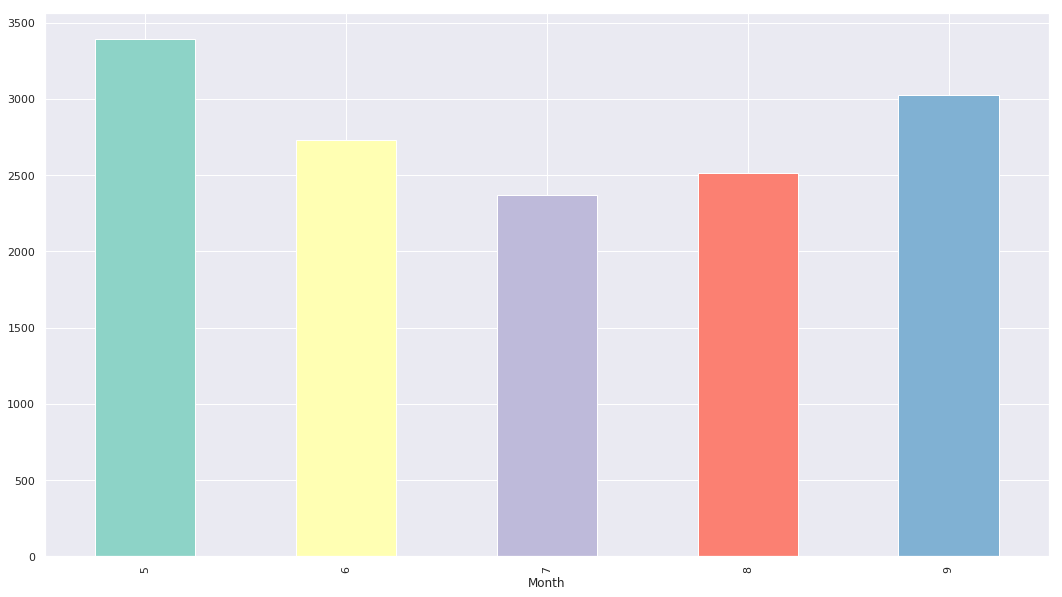

In [34]:
#Data distribution plot Monthly
monthplot = numeric_data.groupby(['Month']).count()['Year']
monthplot.plot(kind='bar')

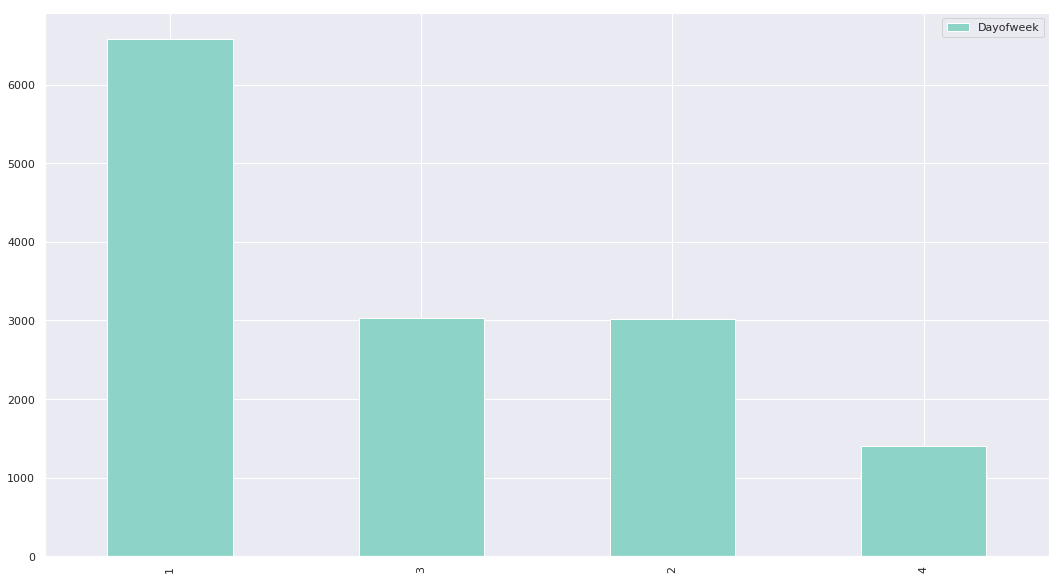

In [33]:
#Day of Week Plot
dayofweek_plot = pd.DataFrame(numeric_data.Dayofweek.value_counts())
dayofweek_plot.plot(kind='bar')

In [31]:
#Monthly Conversion Rate
import seaborn as sns
import matplotlib as plt
def monthly_conversion():
    conv = numeric_data.groupby(['Month']).sum().conversion
    transaction = numeric_data.groupby(['Month']).count().Day
    data = pd.DataFrame(conv/transaction*100).reset_index()
    data.columns = ["Month", "Conversion Rate"]
    sns.set(style="whitegrid", font = "DejaVu Sans")
    sns.set(rc={'figure.figsize':(18,10)})
    sns.set_palette('Set3')
    b = sns.barplot(x= "Month", y="Conversion Rate", data=data)
    b.axes.set_title("Monthly Conversion Rate",fontsize=20)
    b.set_xlabel("Month (2017)",fontsize=20)
    b.set_ylabel("Conversion Rate (%)",fontsize=20)
    
    b.tick_params(labelsize=20)

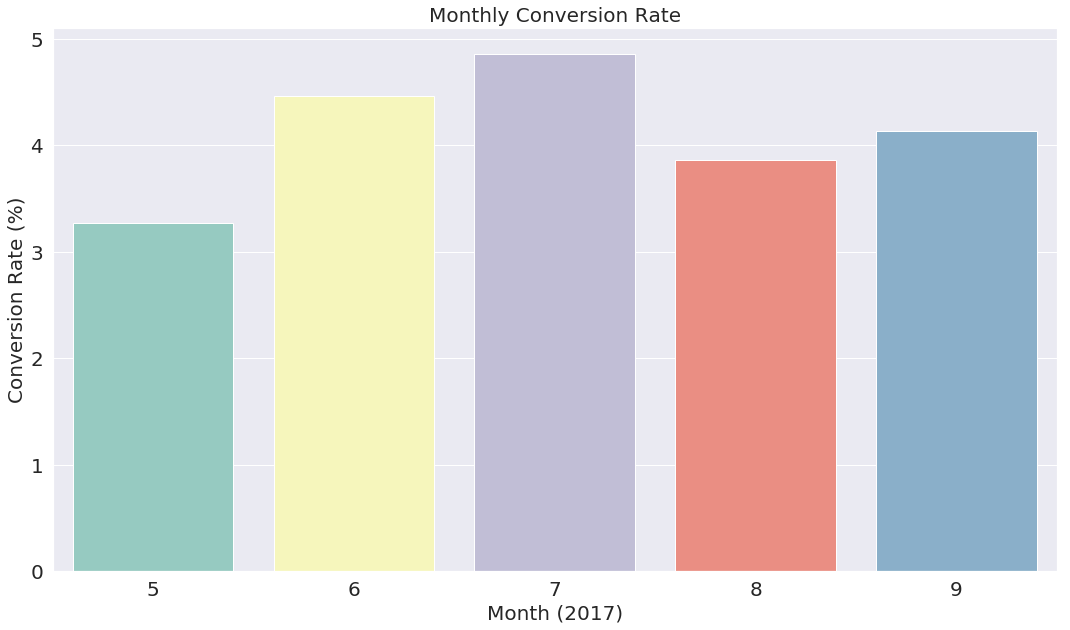

In [32]:
monthly_conversion()

In [41]:
#Monthly Outcome Distribution 
def monthly_outcome():
    outcome = numeric_data.groupby(['Month']).outcome.value_counts()
    df = pd.DataFrame(outcome.unstack().to_dict())
    df.columns = ['Fallback', 'Payout','Combination', 'Voucher']
    ax = df.plot(kind='bar', stacked=True, figsize=(18.5, 10.5))
    ax.set_xlabel("Month", size = 20)
    ax.tick_params(labelsize = 15)
    ax.set_ylabel("Number of Transactions", size=20)
    ax.set_title("Montly Outcome Distribution", size = 25)

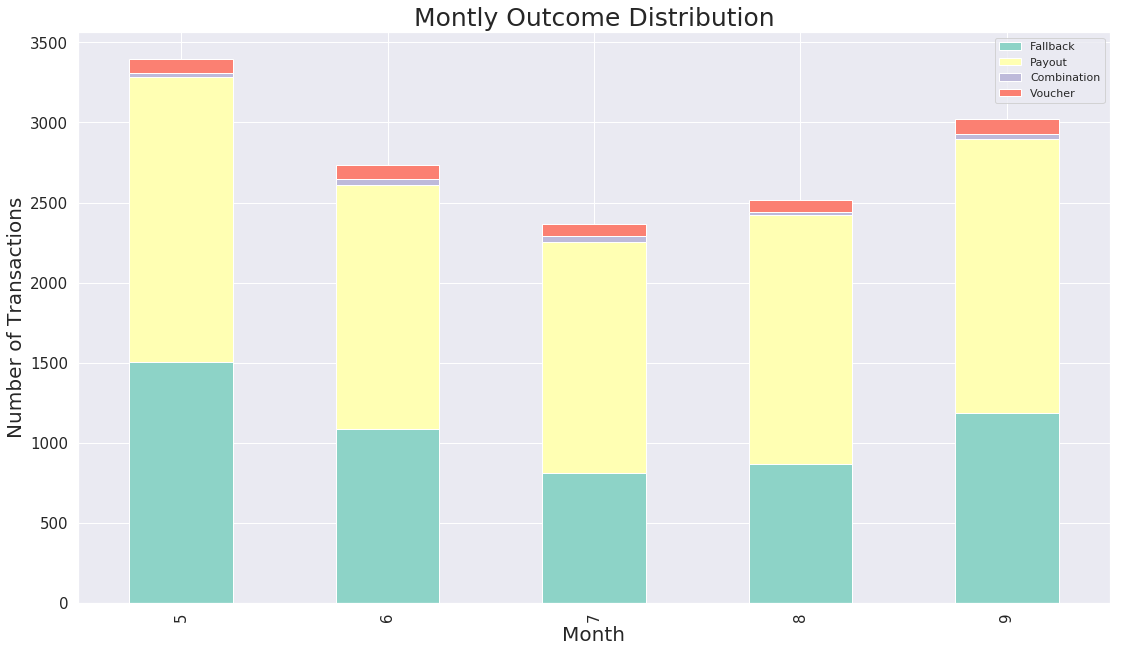

In [58]:
monthly_outcome()

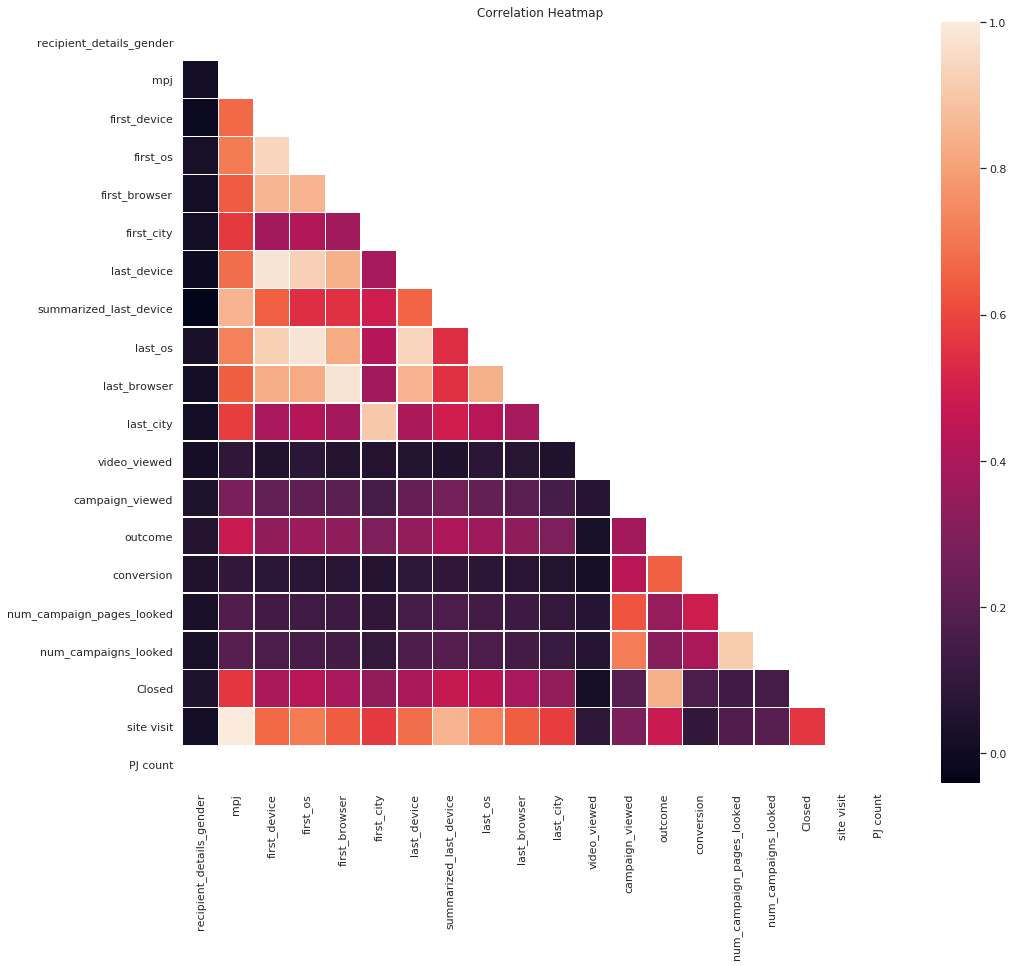

In [35]:
#Correlation Heatmap
sns.set_style('whitegrid')
sns.set_palette('Set3')

m = numeric_data.drop(['Year','Month', 'Day', 'Dayofweek'], axis=1)
m = m.corr()
sns.set(rc={'figure.figsize':(16,14)})
mask = np.zeros_like(m)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(m, linewidths=.5,mask=mask).set_title('Correlation Heatmap')

In [36]:
#Parallel Coordinates of variables and outcome
import plotly.plotly as py
import plotly.graph_objs as go
data = [
    go.Parcoords(
        line = dict(color = numeric_data.conversion,
                   colorscale = [[0,'#D7C16B'],[1,'#23D8C3']]),
        dimensions = list([
            dict(range = [0,20],
                label = 'num_campaigns_looked', values = numeric_data['num_campaigns_looked']),
            dict(range = [0,35],
                label = 'num_campaign_pages_looked', values = numeric_data['num_campaign_pages_looked']),
            dict(range = [0,1],
                label = 'campaign_viewed', values = numeric_data['campaign_viewed']),
            dict(range = [0,3],
                label = 'outcome', values = numeric_data['outcome']),
            dict(range = [0,1],
                label = 'Closed', values = numeric_data['Closed']),
            dict(range = [0,1],
                label = 'conversion', values = numeric_data['conversion']),
        ])
        )
    ]

layout = go.Layout(
        plot_bgcolor = '#000000',
        paper_bgcolor = '#FFFFFF'
    )

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-basic')

In [37]:
#Campaign vs No Campaign Chart
def conversion_factor():
    lc = numeric_data[(numeric_data['num_campaigns_looked'] > 0) & (numeric_data['conversion'] > 0)].count()[0]
    nlc = numeric_data[(numeric_data['num_campaigns_looked'] == 0) & (numeric_data['conversion'] > 0)].count()[0]
    lnc = numeric_data[(numeric_data['num_campaigns_looked'] > 0) & (numeric_data['conversion'] == 0)].count()[0]
    nlnc = numeric_data[(numeric_data['num_campaigns_looked'] == 0) & (numeric_data['conversion'] == 0)].count()[0]
    a = lc / (lc+lnc) *100
    b = lnc / (lc+lnc) *100
    c = nlc / (nlc + nlnc) * 100
    d = nlnc / (nlc+nlnc) * 100
    df = pd.DataFrame([[b,a],[d, c]])
    df.index = ['Campaign', 'No Campaign']
    df.columns = ['Not Converted', 'Converted']
    sns.set_palette('Set2')
    ax = df.plot(kind='bar', stacked=True, figsize=(24.5, 14))    
    ax.tick_params(labelsize = 18)
    ax.legend(prop=dict(size=20))
    ax.text(-0.09, 78, "514(24%)", size=30, color = 'white')
    ax.text(-0.11, 70, "1,612(76%)", size=30, color = 'white')
    ax.text(0.88, 101, "56(0.05%)", size=30, color = 'red')
    ax.text(0.83, 95, "11,851(99.5%)", size=30, color = 'white')
    ax.set_ylabel("Conversion(%)", size=20)
    ax.set_title("Campaign vs No Campaign", size = 35)

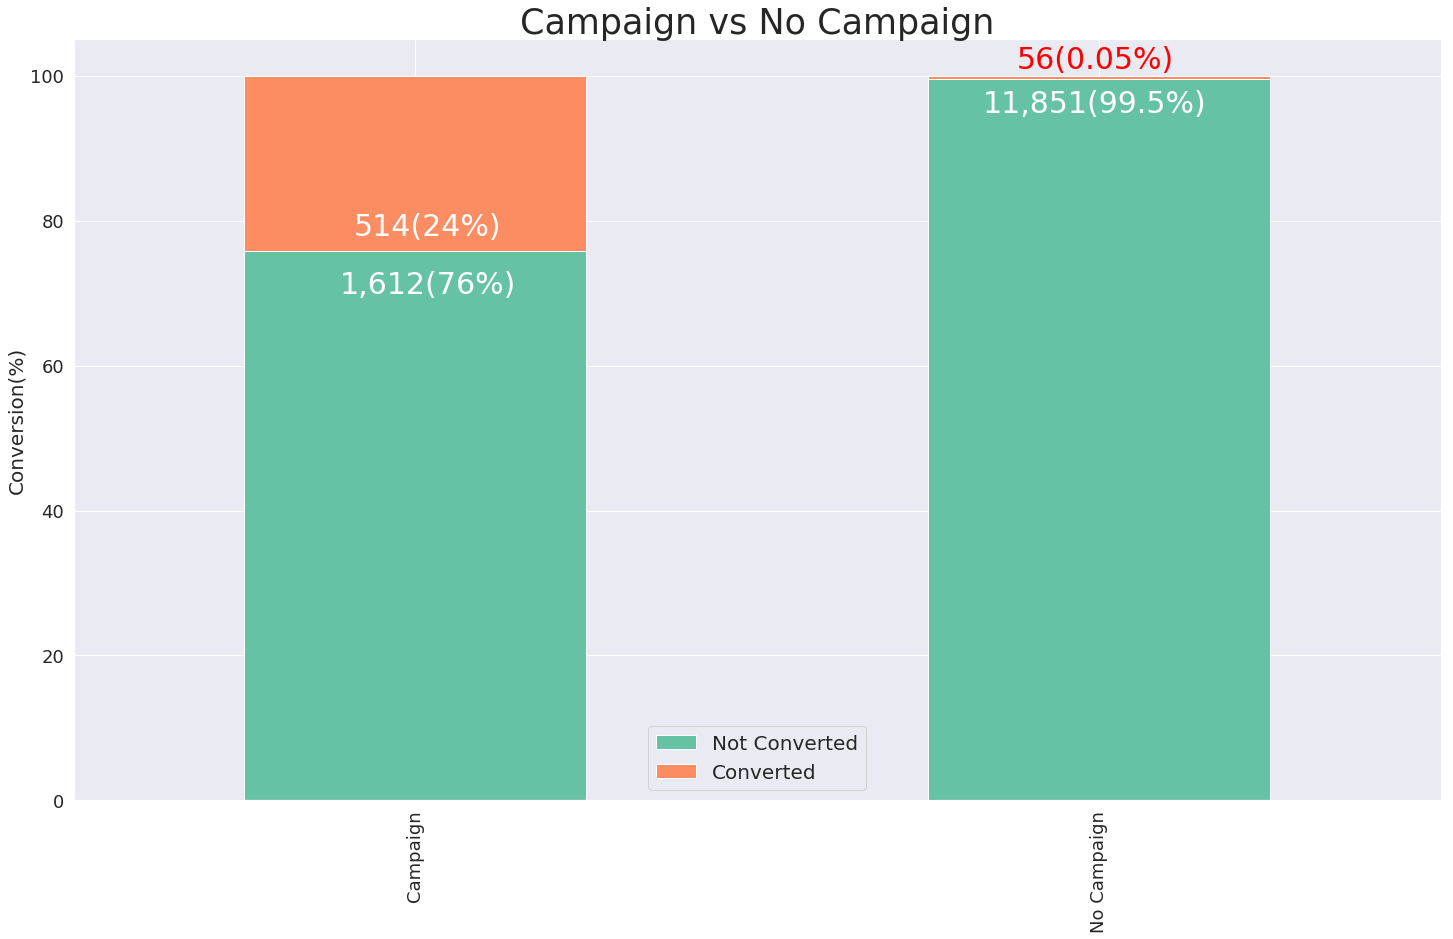

In [38]:
conversion_factor()

In [43]:
# Missing data Imputer with RandomForest classifier, did not improve prediction accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
def impute(column_name):
    #scaler =  MinMaxScaler()
    scaler = StandardScaler()
    X_train = pd.DataFrame(numeric_data.loc[numeric_data[column_name] != 0]).drop([column_name], axis=1)
    X_train = scaler.fit_transform(X_train)
    y_train = pd.DataFrame(numeric_data.loc[numeric_data[column_name] != 0])[column_name]
    rf_classifier = RandomForestClassifier(max_depth = 11, random_state = 7)
    rf_classifier.fit(X_train, y_train)
    X_test = pd.DataFrame(numeric_data.loc[numeric_data[column_name] == 0]).drop([column_name], axis=1)
    X_test = scaler.fit_transform(X_test)
    y_test = rf_classifier.predict(X_test)
    numeric_data.loc[numeric_data[column_name] == 0].loc[:, column_name] = y_test

In [45]:
missing_data = ['recipient_details_gender', 'first_device', 'first_os', 'first_browser', 'first_city',
       'last_device', 'summarized_last_device', 'last_os', 'last_browser','last_city']

In [46]:
#Imputer Run
'''
for i in missing_data:
    impute(i)
numeric_data.Closed = numeric_data.Closed.astype(int)
'''

'\nfor i in missing_data:\n    impute(i)\nnumeric_data.Closed = numeric_data.Closed.astype(int)\n'

In [48]:
#Feature Engineering for enhancing prediction model (Can improve feature prediction accuracy)
'''
feature1 = numeric_data.num_campaign_pages_looked^2
numeric_data['feature1'] = feature1
feature2 = numeric_data.num_campaigns_looked^2
numeric_data['feature2'] = feature2
feature3 = numeric_data.num_campaign_pages_looked * numeric_data.num_campaigns_looked * numeric_data.campaign_viewed
numeric_data['feature3'] = feature3
feature4 = numeric_data.num_campaigns_looked * numeric_data.campaign_viewed
numeric_data['feature4'] = feature4
feature5 = numeric_data.num_campaigns_looked * numeric_data.num_campaign_pages_looked
numeric_data['feature5'] = feature5
feature6 = numeric_data.num_campaign_pages_looked * numeric_data.campaign_viewed
numeric_data['feature6'] = feature6
feature7 = numeric_data.num_campaigns_looked + numeric_data.num_campaign_pages_looked
numeric_data['feature7'] = feature7
'''

"\nfeature1 = numeric_data.num_campaign_pages_looked^2\nnumeric_data['feature1'] = feature1\nfeature2 = numeric_data.num_campaigns_looked^2\nnumeric_data['feature2'] = feature2\nfeature3 = numeric_data.num_campaign_pages_looked * numeric_data.num_campaigns_looked * numeric_data.campaign_viewed\nnumeric_data['feature3'] = feature3\nfeature4 = numeric_data.num_campaigns_looked * numeric_data.campaign_viewed\nnumeric_data['feature4'] = feature4\nfeature5 = numeric_data.num_campaigns_looked * numeric_data.num_campaign_pages_looked\nnumeric_data['feature5'] = feature5\nfeature6 = numeric_data.num_campaign_pages_looked * numeric_data.campaign_viewed\nnumeric_data['feature6'] = feature6\nfeature7 = numeric_data.num_campaigns_looked + numeric_data.num_campaign_pages_looked\nnumeric_data['feature7'] = feature7\n"

In [49]:
numeric_data.head()

,Year,Month,Day,Dayofweek,recipient_details_gender,mpj,first_device,first_os,first_browser,first_city,...,last_city,video_viewed,campaign_viewed,outcome,conversion,num_campaign_pages_looked,num_campaigns_looked,Closed,site visit,PJ count
0,2017,5,2,1,2,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0.0,0,1
1,2017,5,2,1,2,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0.0,0,1
2,2017,5,2,1,2,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0.0,0,1
3,2017,5,2,1,2,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0.0,0,1
4,2017,5,2,1,2,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0.0,0,1


In [54]:
#Target: Conversion / Classification Model Analysis
numeric_data_X = numeric_data.drop(['outcome','conversion','Closed', 'PJ count', 'Year', 'first_city', 'last_city'], axis = 1)
#scaler = StandardScaler()
scaler = MinMaxScaler()
X = np.array(scaler.fit_transform(numeric_data_X))
y = np.array(numeric_data['outcome'])
y_conversion = np.array(numeric_data['conversion'])
y_closed = np.array(numeric_data['Closed'])
offset = int(X.shape[0] * 0.8)
X_train, y_train = X[:offset], y_conversion[:offset]
X_test, y_test = X[offset:], y_conversion[offset:]

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [56]:
#Feature Importance Plot
def plot_feature_importances(feature_importances, title, feature_names):
    feature_importances = 100.0 * (feature_importances / max(feature_importances))
    index_sorted = np.flipud(np.argsort(feature_importances))
    # Center the location of the labels on the X-axis (for display purposes only)
    pos = np.arange(index_sorted.shape[0]) + 0.5
    # Plot the bar graph
    plt.figure(figsize=(40, 18))
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted], rotation = 60, fontsize=20)
    plt.yticks(fontsize=30)
    plt.ylabel('Relative Importance', fontsize= 40)
    plt.title(title, fontsize = 50)
    plt.show()

In [57]:
conv_model = pd.DataFrame()

In [58]:
#Gradient Boosting Machine Classifier
def gbm(y_train):
    gb_classifier = GradientBoostingClassifier()
    gb_classifier.fit(X_train, y_train)
    y_pred_gb = gb_classifier.predict(X_test)
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    evs_gb = explained_variance_score(y_test, y_pred_gb)
    accuracy = accuracy_score(y_test,gb_classifier.predict(X_test))
    print("Gradient Boost", "MSE: ", mse_gb, "EVS: ", evs_gb, "Accuracy Score: ", accuracy)
    gbm_result = [mse_gb, evs_gb, accuracy]
    plot_feature_importances(gb_classifier.feature_importances_,'GBM Classifier', numeric_data_X.columns)
    conv_model['GBM'] = gbm_result
    return conv_model

Gradient Boost MSE:  0.03633772711079444 EVS:  0.1281168589505024 Accuracy Score:  0.9636622728892056


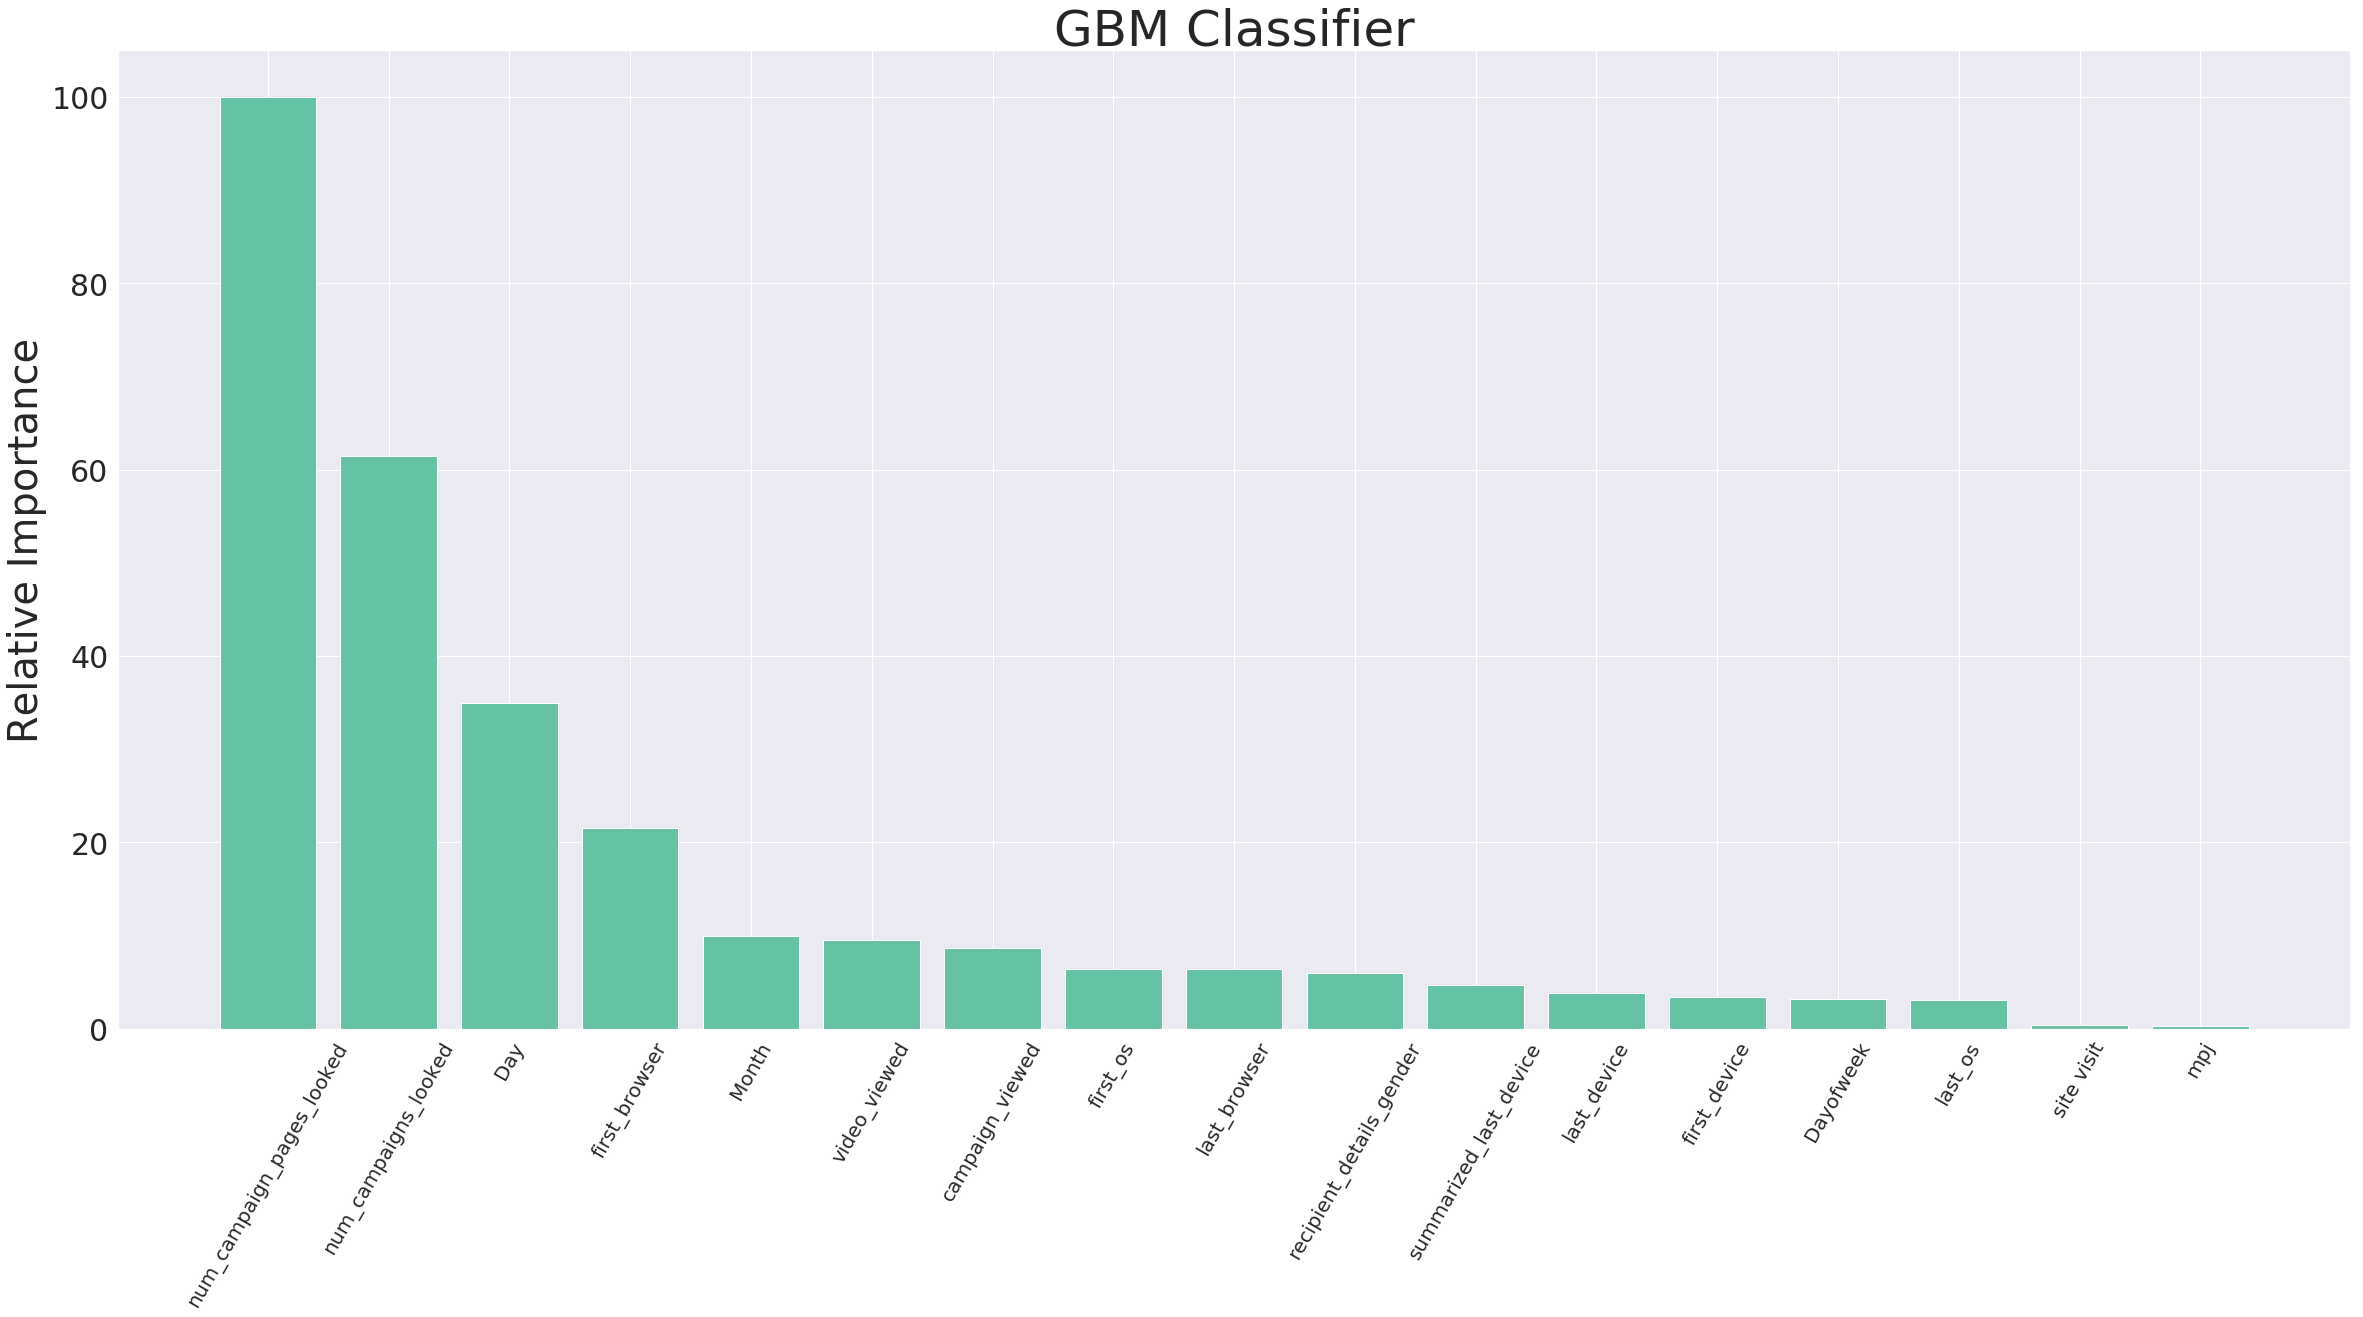

,GBM
0,0.036338
1,0.128117
2,0.963662


In [59]:
gbm(y_train)

In [60]:
# Random Forest Classifier
def rf(y_train):
    rf_classifier = RandomForestClassifier(max_depth = 11, random_state = 7)
    rf_classifier.fit(X_train, y_train)
    y_pred_rf = rf_classifier.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    evs_rf = explained_variance_score(y_test, y_pred_rf)
    accuracy = accuracy_score(y_test,rf_classifier.predict(X_test))
    print("Random Forest", "MSE: ", mse_rf, "EVS: ", evs_rf, "Accuracy Score: ", accuracy)
    rf_result = [mse_rf, evs_rf, accuracy]
    plot_feature_importances(rf_classifier.feature_importances_,'Random Forest Classifier', numeric_data_X.columns)
    conv_model['RF'] = rf_result
    return conv_model

Random Forest MSE:  0.037762736017100104 EVS:  0.10015506760947757 Accuracy Score:  0.9622372639828999


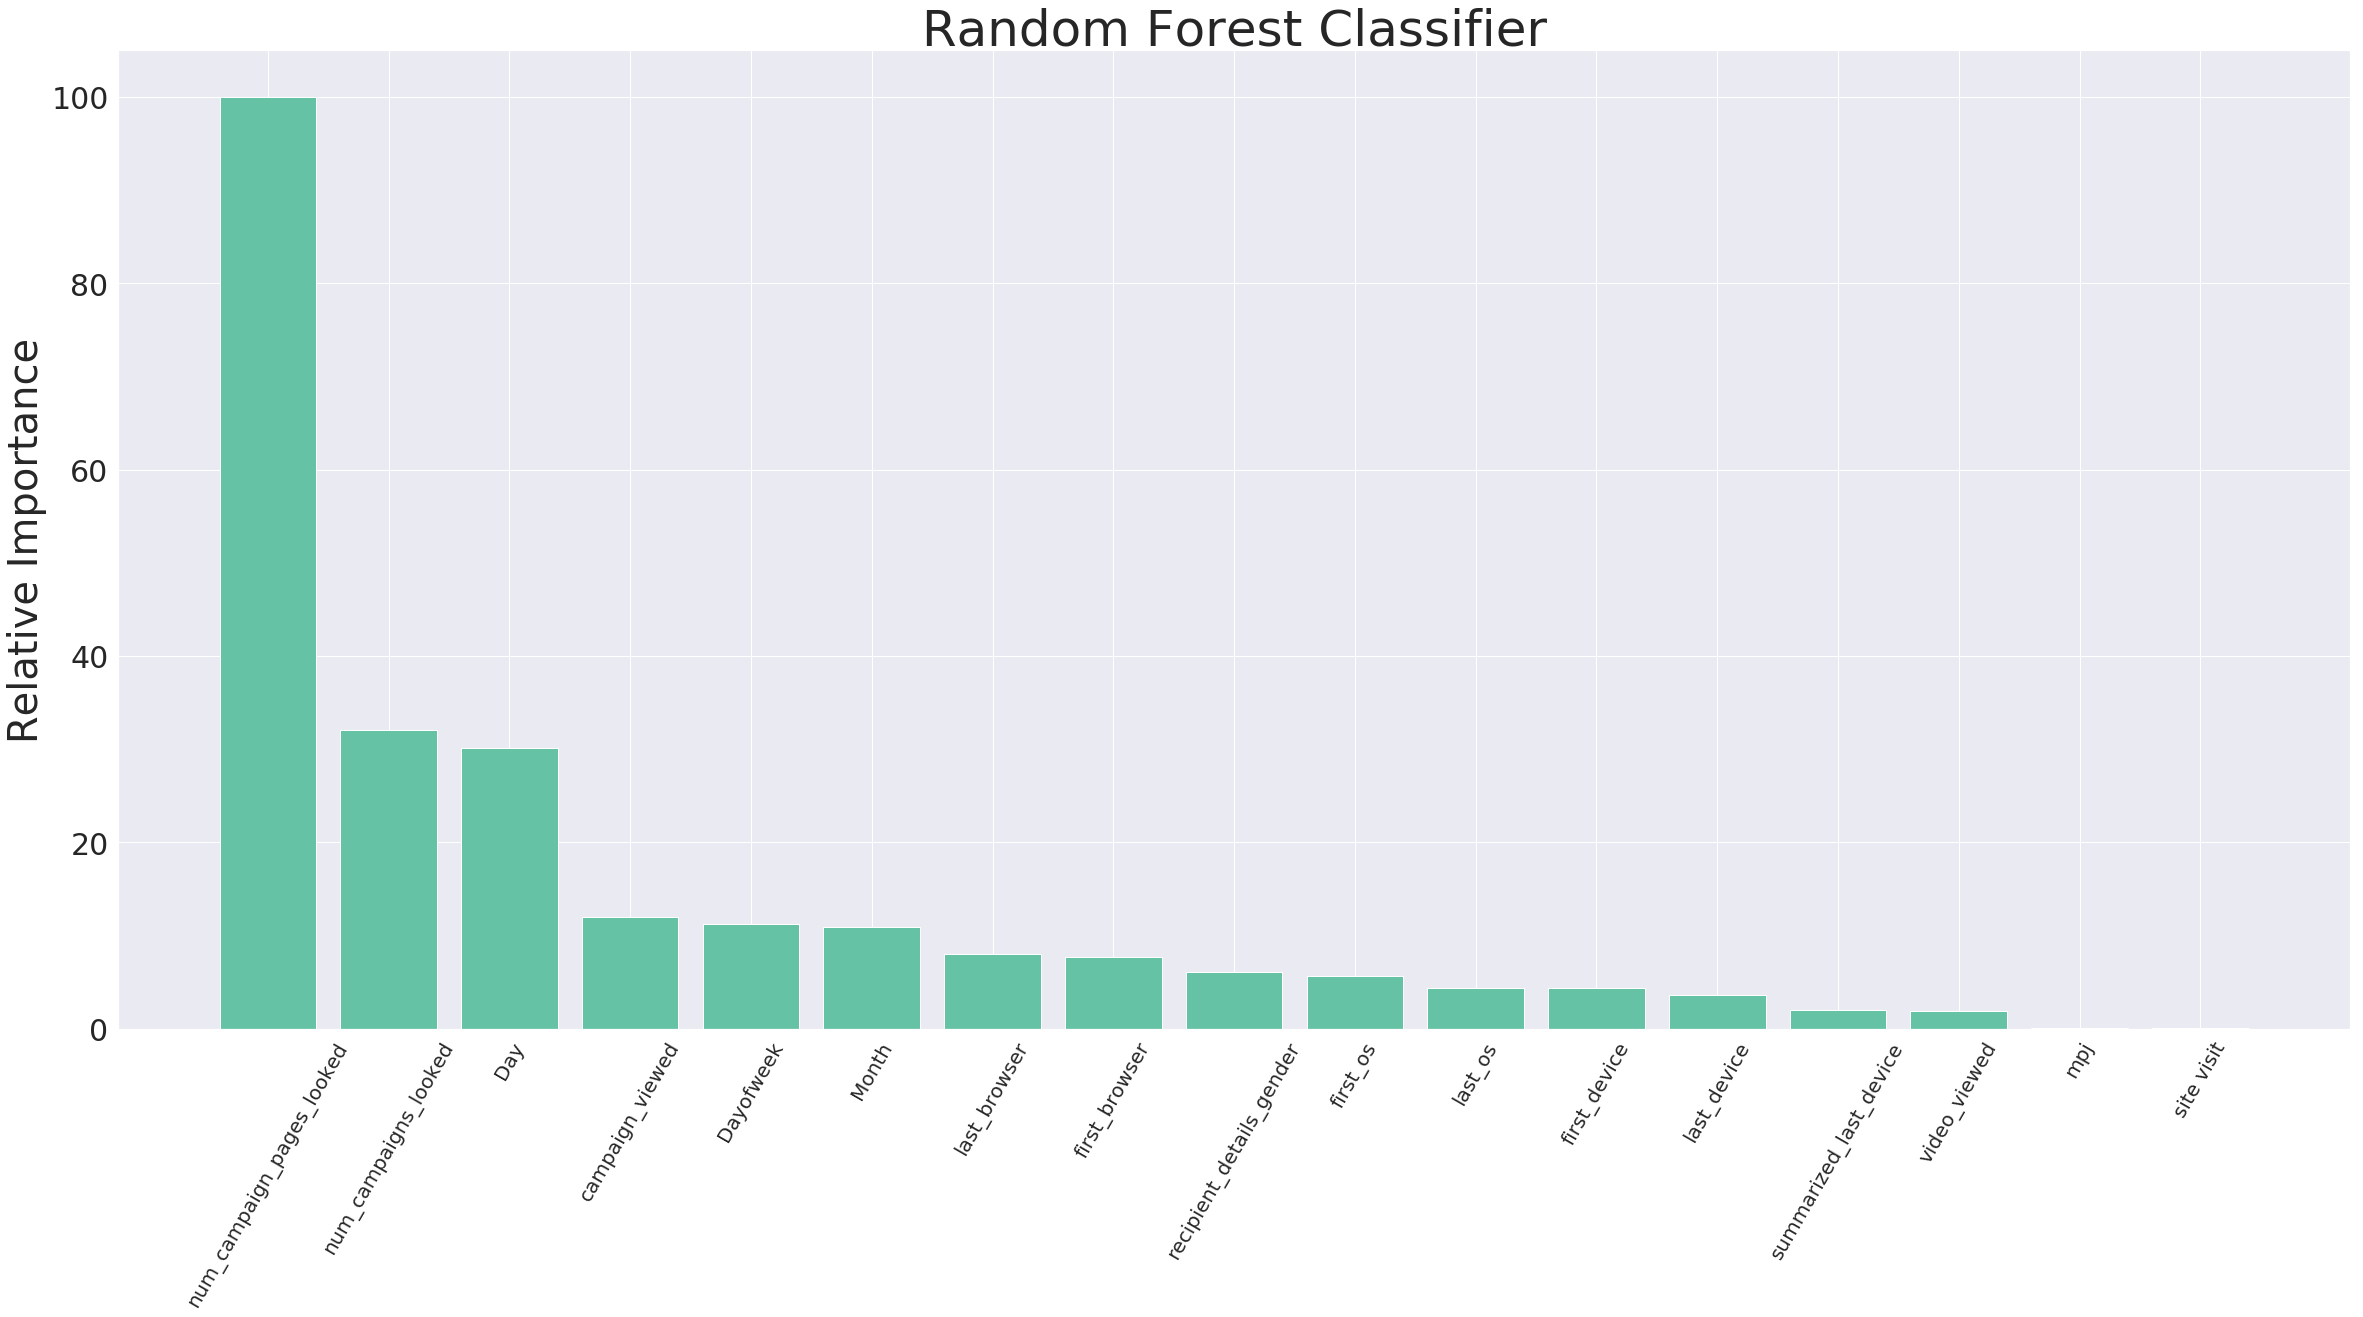

,GBM,RF
0,0.036338,0.037763
1,0.128117,0.100155
2,0.963662,0.962237


In [61]:
rf(y_train)

In [62]:
# Decision Tree Classifier
def dt(y_train):
    dt_classifier = DecisionTreeClassifier(max_depth = 4)
    dt_classifier.fit(X_train, y_train)
    y_pred_dt = dt_classifier.predict(X_test)
    mse_dt = mean_squared_error(y_test, y_pred_dt)
    evs_dt = explained_variance_score(y_test, y_pred_dt)
    accuracy = accuracy_score(y_test,dt_classifier.predict(X_test))
    dt_result = [mse_dt, evs_dt, accuracy]
    print("Decision Tree", "MSE: ", mse_dt, "EVS: ", evs_dt, "Accuracy Score: ", accuracy)
    plot_feature_importances(dt_classifier.feature_importances_,'Decision Tree Classifier', numeric_data_X.columns)
    conv_model['DT'] = dt_result
    return conv_model

Decision Tree MSE:  0.035981474884218025 EVS:  0.13384815779679915 Accuracy Score:  0.964018525115782


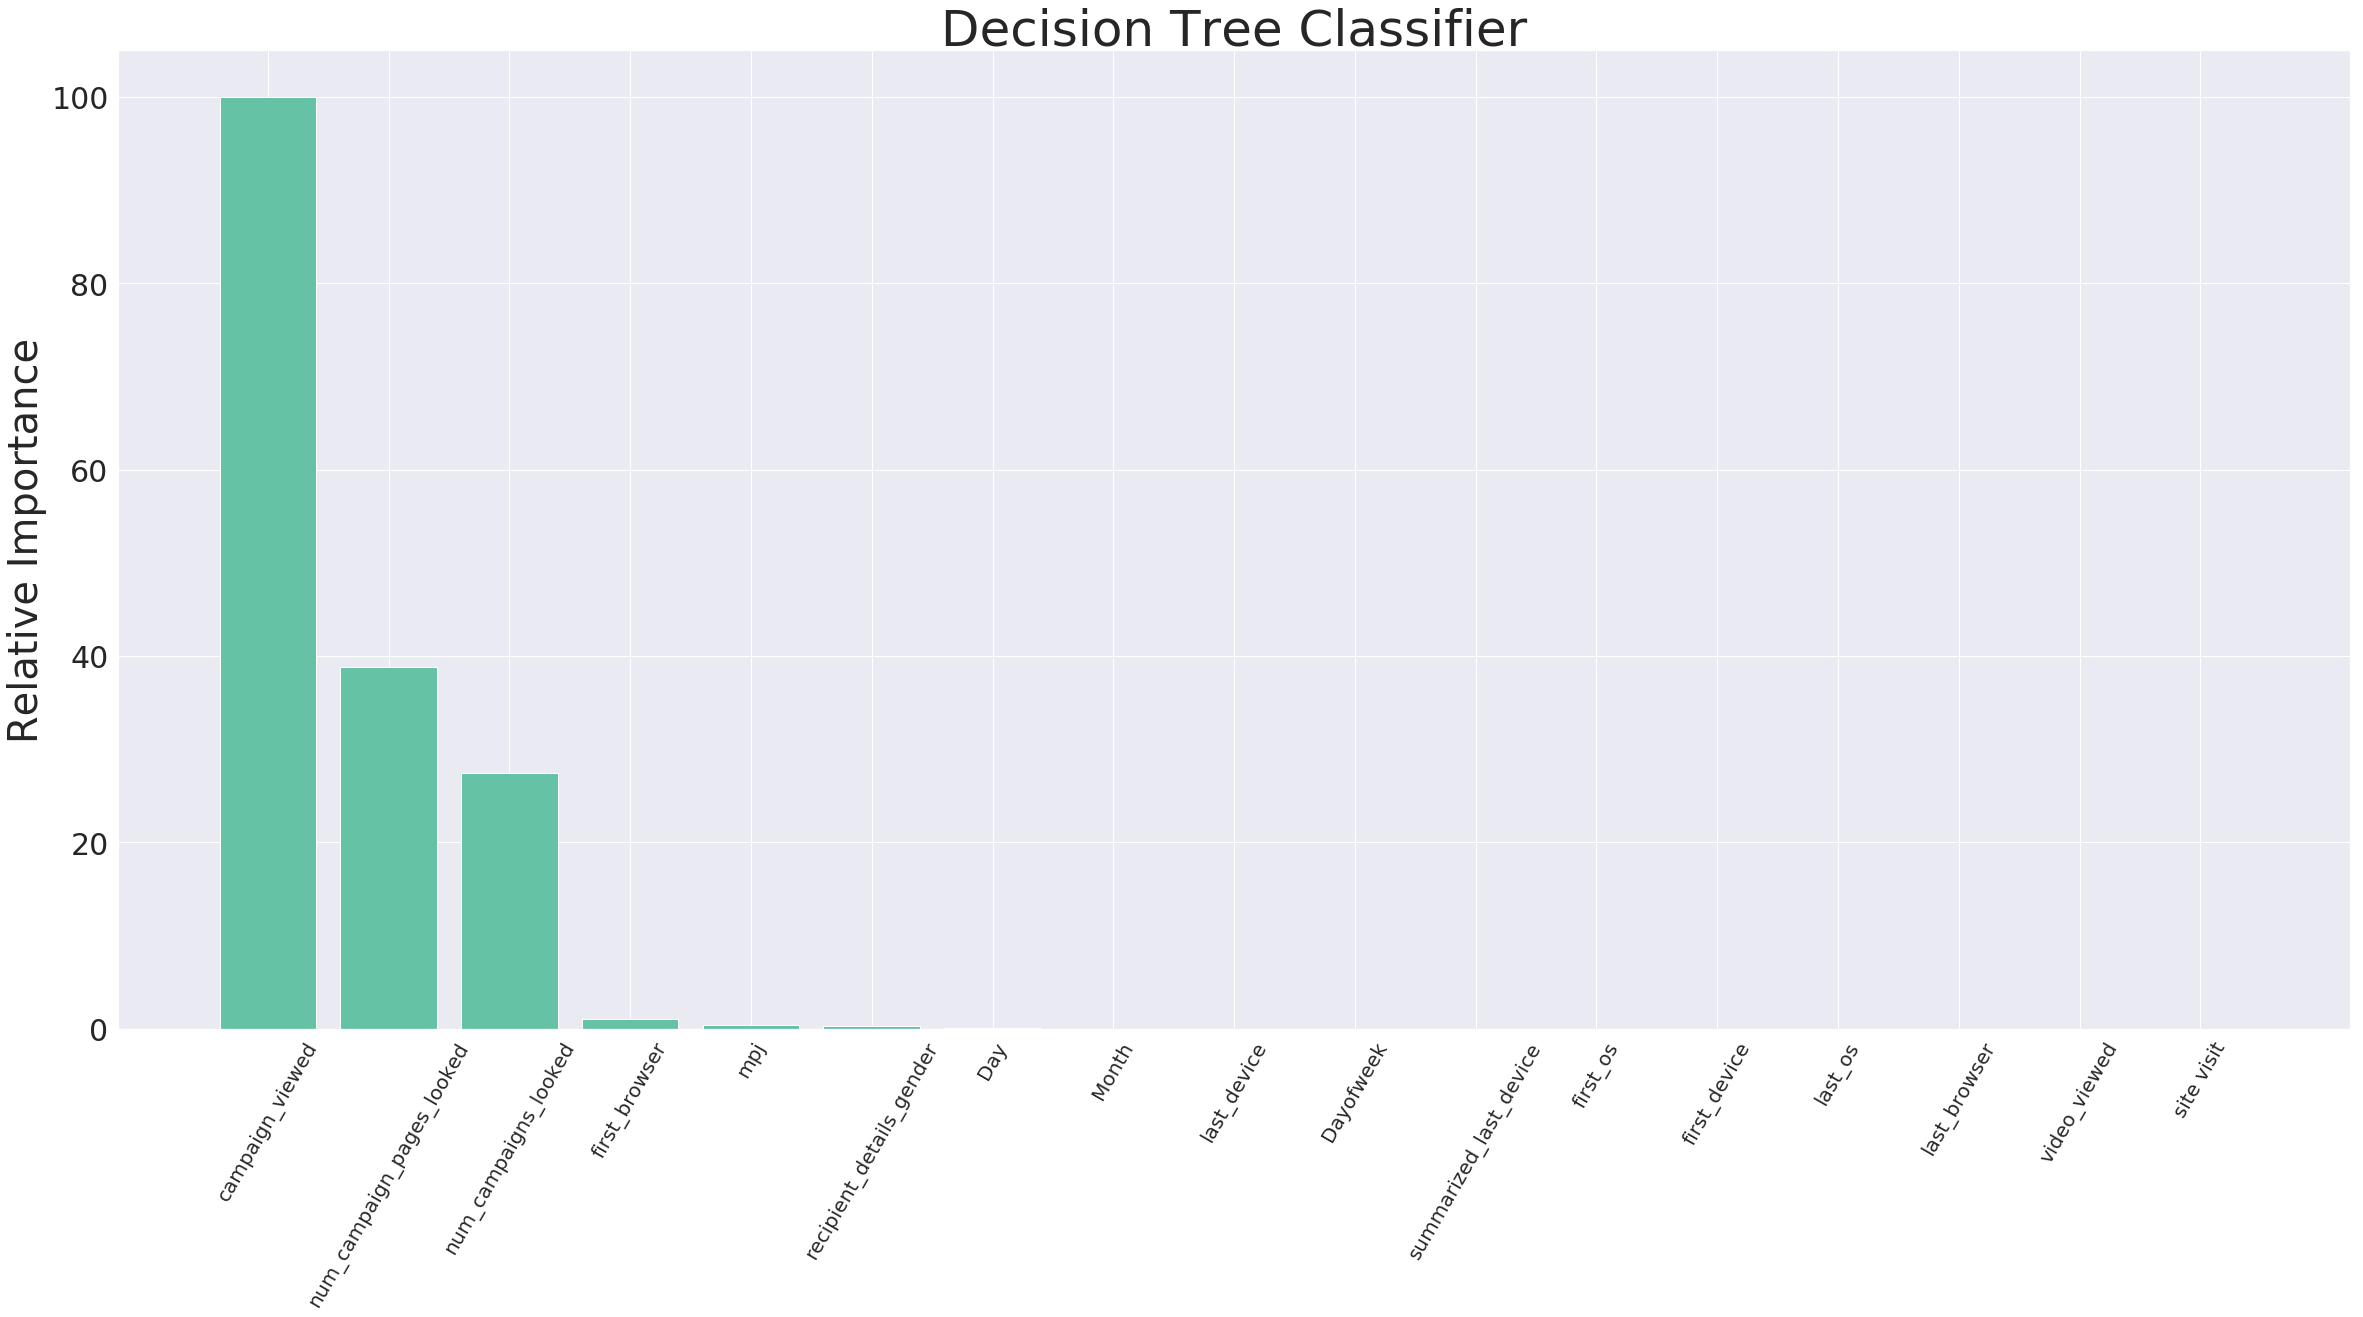

,GBM,RF,DT
0,0.036338,0.037763,0.035981
1,0.128117,0.100155,0.133848
2,0.963662,0.962237,0.964019


In [63]:
dt(y_train)

In [64]:
# ADA Boost Classifier
def adaboost(y_train):
    ab_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = 100, random_state = 7)
    ab_classifier.fit(X_train, y_train)
    y_pred_ab = ab_classifier.predict(X_test)
    mse_ab = mean_squared_error(y_test, y_pred_ab)
    evs_ab = explained_variance_score(y_test, y_pred_ab)
    accuracy = accuracy_score(y_test,ab_classifier.predict(X_test))
    ab_result = [mse_ab, evs_ab, accuracy]
    print("ADA Boost", "MSE: ", mse_ab, "EVS: ", evs_ab, "Accuracy Score: ", accuracy )
    plot_feature_importances(ab_classifier.feature_importances_,'AdaBoost Classifier', numeric_data_X.columns)
    conv_model['ADA'] = ab_result
    return conv_model

ADA Boost MSE:  0.03562522265764161 EVS:  0.14552785014266212 Accuracy Score:  0.9643747773423584


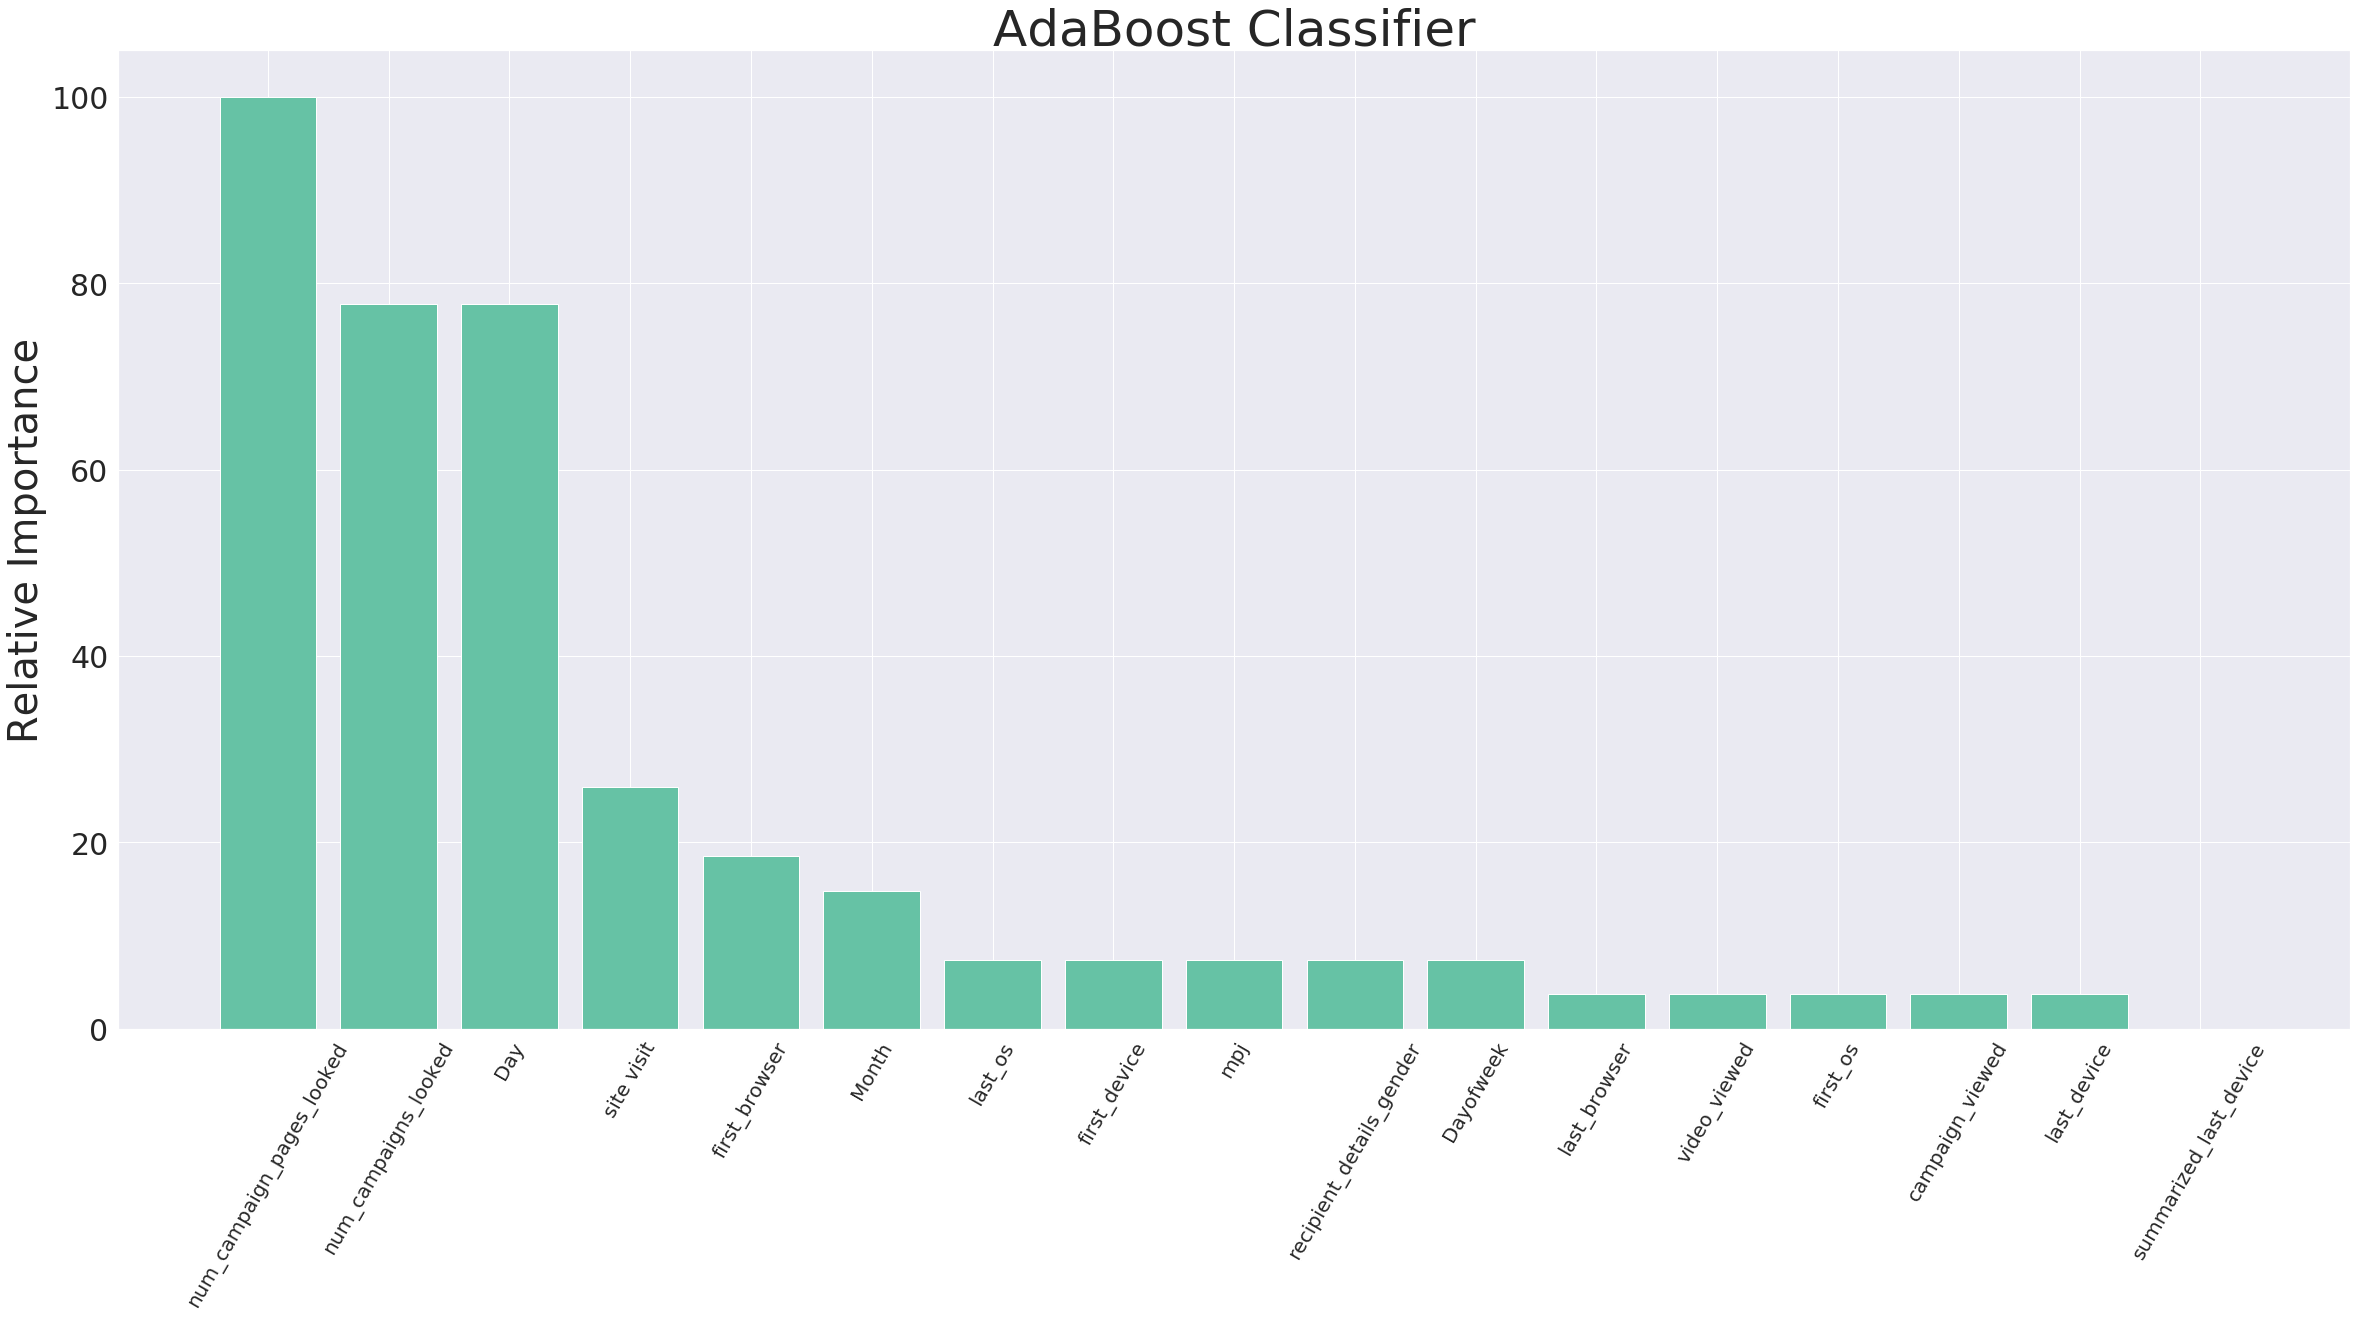

,GBM,RF,DT,ADA
0,0.036338,0.037763,0.035981,0.035625
1,0.128117,0.100155,0.133848,0.145528
2,0.963662,0.962237,0.964019,0.964375


In [65]:
adaboost(y_train)

In [66]:
# 4 Models performance comparison (All good)
def conversion_model():
    conv_model.T.plot(kind='bar')

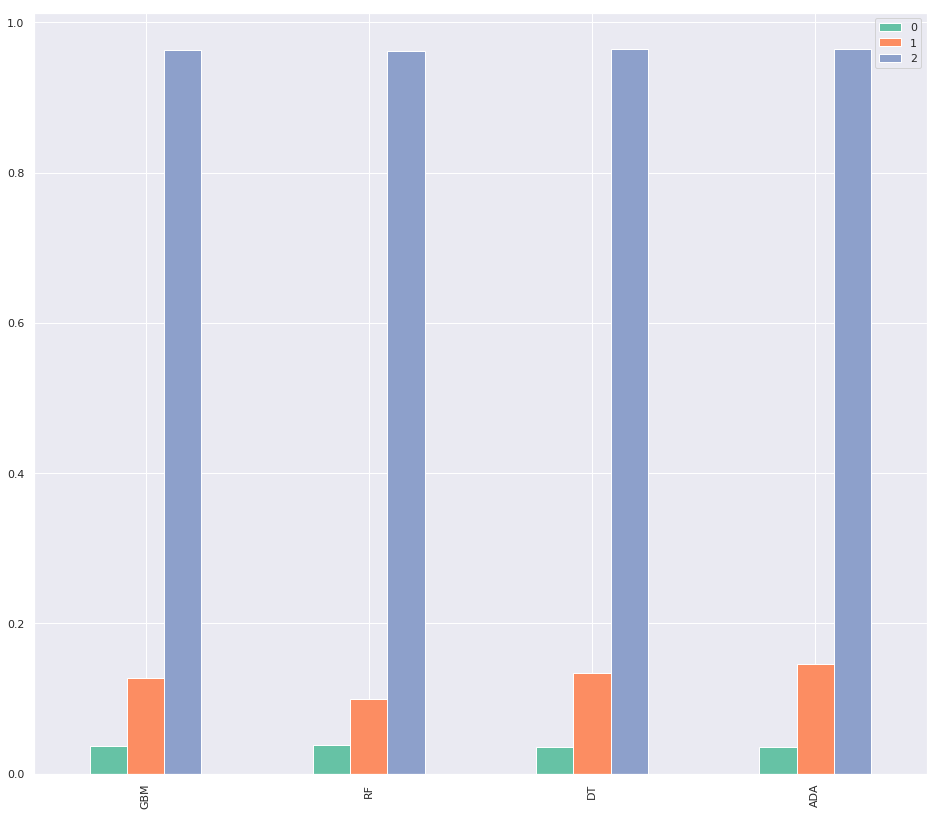

In [67]:
conversion_model()

In [68]:
# Closed vs Fallback Driver Analysis
# Fallback: 1 and Closed: 0 to analyse key drivers of Fallback
closedata=[]
for i in numeric_data['Closed']:
    if i == 0:
        closedata.append(1)
    elif i ==1:
        closedata.append(0)

In [69]:
#Y Value update 
closed_data = numeric_data_X.drop(['last_os', 'first_os','first_device','last_device'], axis=1)
X = np.array(scaler.fit_transform(closed_data))
y_closed = np.array(closedata)
offset = int(X.shape[0] * 0.8)
X_train, y_train = X[:offset], y_closed[:offset]
X_test, y_test = X[offset:], y_closed[offset:]

In [72]:
#Logistic Regression Model - Odds Ratio
from sklearn.linear_model import LogisticRegression
def lr(y_train):
    lr_classifier = LogisticRegression()
    lr_classifier.fit(X_train, y_train)
    y_pred_lr = lr_classifier.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    evs_lr = explained_variance_score(y_test, y_pred_lr)
    accuracy_score(y_test,lr_classifier.predict(X_test))
    #Odds Ratio = exp(coefficient)
    lr_coef = pd.DataFrame(np.exp(lr_classifier.coef_))
    lr_coef.columns = closed_data.columns
    return lr_coef

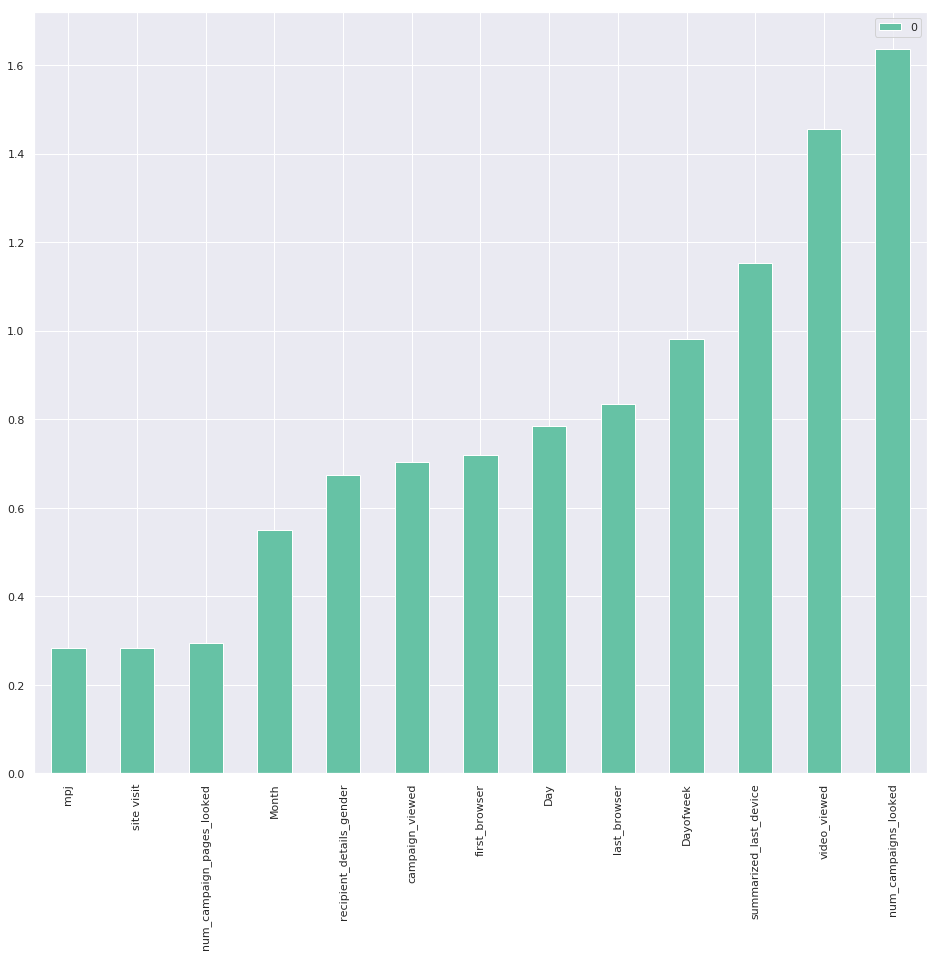

In [73]:
# Odds Ratio Plot
lrplot = lr(y_train).T.sort_values([0])
lrplot.plot(kind='bar')

In [75]:
#Fallback Key Driver Linear SVC - Odds Ratio
from sklearn import svm
from sklearn.svm import LinearSVC
def linearSVC(y_train):
    lsvc = svm.LinearSVC(class_weight='balanced')
    lsvc.fit(X_train, y_train) 
    y_pred_svc = lsvc.predict(X_test)
    mse_svc = mean_squared_error(y_test, y_pred_svc)
    evs_svc = explained_variance_score(y_test, y_pred_svc)
    lsvc_odds = pd.DataFrame(np.exp(lsvc.coef_))
    lsvc_odds.columns = closed_data.columns
    print("RF", "MSE: ", mse_svc, "EVS: ", evs_svc)
    return lsvc_odds

RF MSE:  0.18738867117919486 EVS:  0.23471825474572738


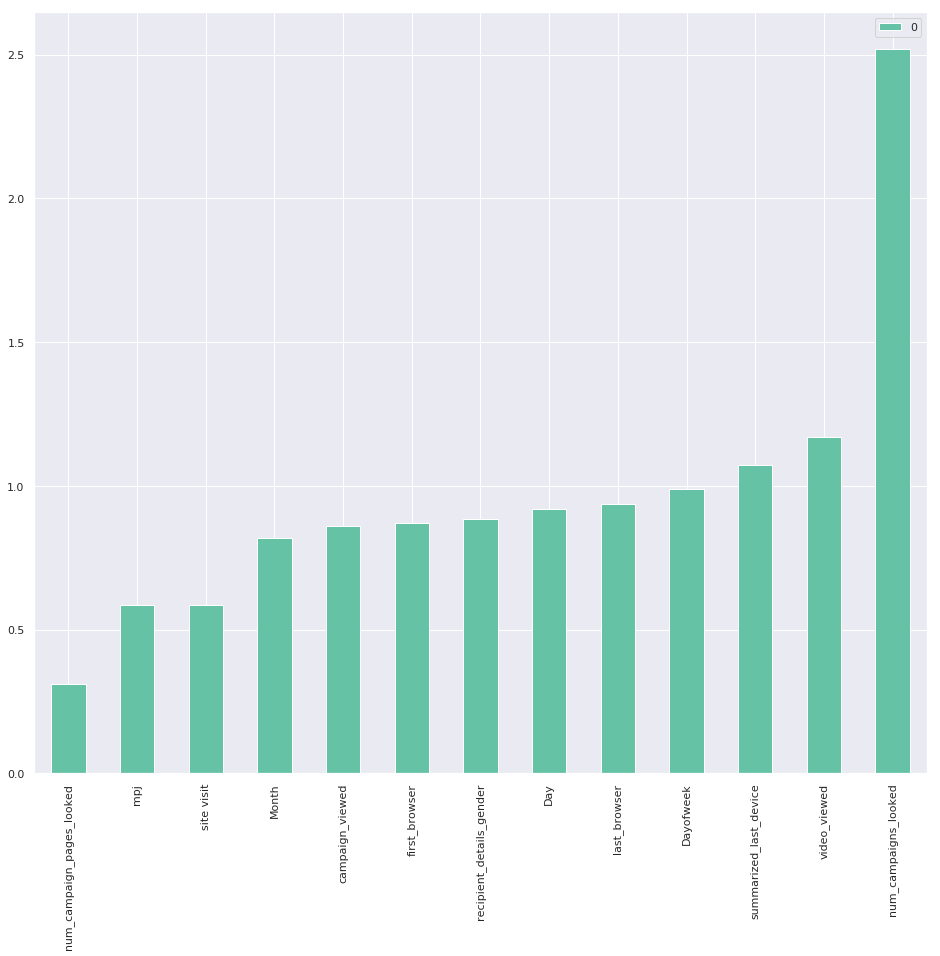

In [76]:
#  Odds Ratio Plot
svcplot = linearSVC(y_train).T.sort_values([0])
svcplot.plot(kind='bar')

In [69]:
# SVD and PCA try - did not work
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cross_validation import train_test_split
y_conversion = np.array(numeric_data['conversion'])
offset = int(X.shape[0] * 0.8)
X_train, y_train = X[:offset], y_conversion[:offset]
X_test, y_test = X[offset:], y_conversion[offset:]

In [79]:
#2 Components SVD
from sklearn.decomposition.truncated_svd import TruncatedSVD
svd = TruncatedSVD(n_components=2)
reduced_data = svd.fit_transform(X_train)
final_svd = pd.concat([pd.DataFrame(reduced_data), pd.DataFrame(y_train)], axis = 1)
final_svd.columns = ['pc1', 'pc2', 'target']

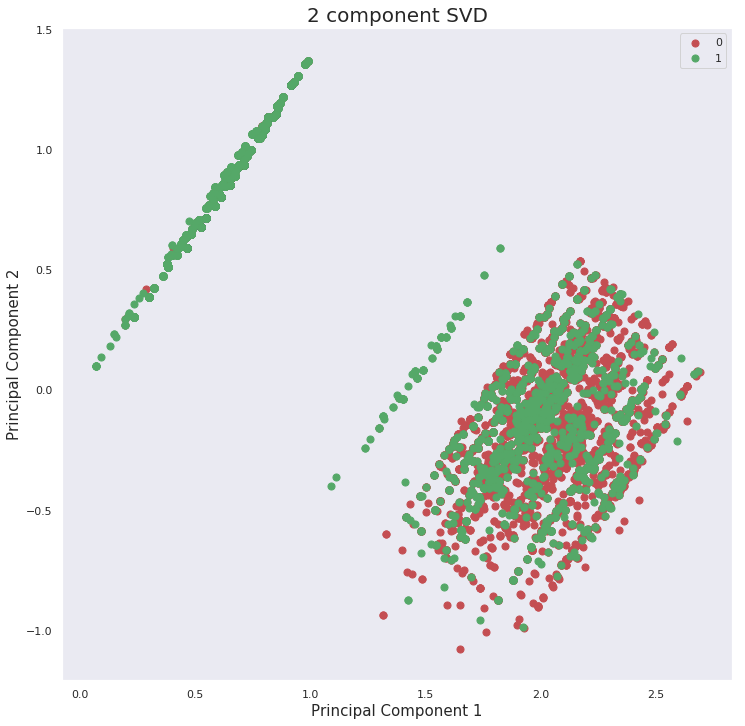

In [80]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component SVD', fontsize = 20)

targets = [0,1,2,3]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_svd['target'] == target
    ax.scatter(final_svd.loc[indicesToKeep, 'pc1']
               , final_svd.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [82]:
# 2 Components PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y_train)], axis = 1)

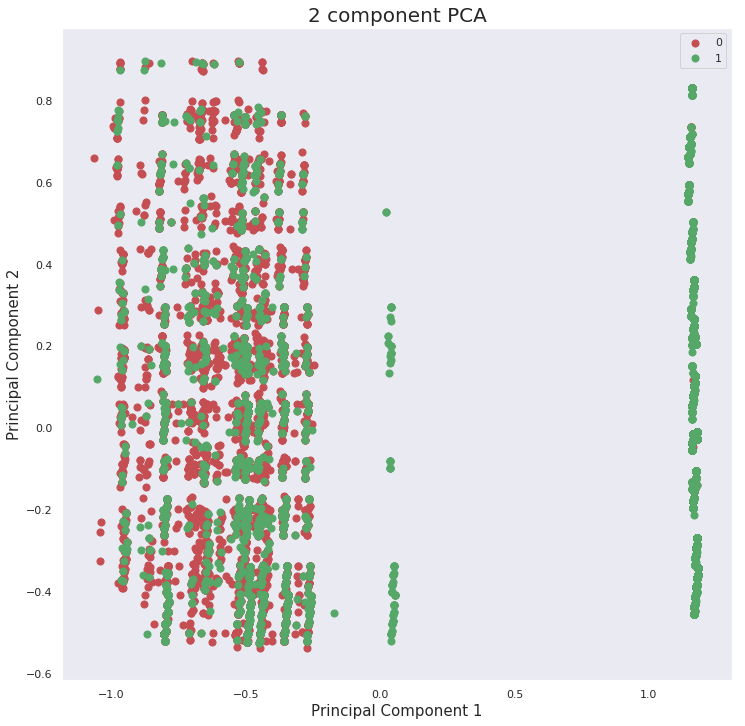

In [83]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [89]:
# 2 Component MCA Analysis
import prince
mca = prince.MCA(n_components=2,
     n_iter=3,
     copy=True,
     engine='auto',
     random_state=42)
mca = mca.fit(X_train)

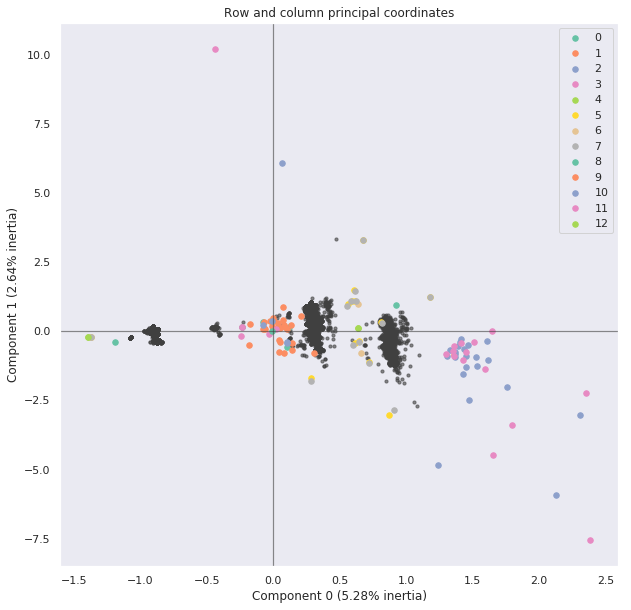

In [90]:
#MCA PLot - No interesting result
ax = mca.plot_coordinates(
     X=X_train,
     ax=None,
     figsize=(10, 10),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1)

In [86]:
# LSTM Classification Try - did not improve accuracy

In [178]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

/home/shin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


In [179]:
#1 Target variable: Closed / no much difference from Logistic Regression and Linear SVC Model
X_train, y_train = X[:offset], y_closed[:offset]
X_test, y_test = X[offset:], y_closed[offset:]
X_train = sequence.pad_sequences(X_train)
X_test = sequence.pad_sequences(X_test)

In [181]:
model = Sequential()
model.add(Embedding(19, 32, input_length=19))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 19, 32)            608       
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 53,909
Trainable params: 53,909
Non-trainable params: 0
_________________________________________________________________
None
Train on 11226 samples, validate on 2807 samples
Epoch 1/4
11226/11226 [==============================] - 4s 357us/step - loss: 0.5778 - acc: 0.7362 - val_loss: 0.5142 - val_acc: 0.8126
Epoch 2/4
11226/11226 [==============================] - 3s 254us/step - loss: 0.5169 - acc: 0.7911 - val_loss: 0.4923 - val_acc: 0.8126
Epoch 3/4
11226/11226 [==============================] - 3s 251us/step - l

In [ ]:
#2 LSTM deep learning model / Target variable: Conversion 
def create_model(input_length):
    print ('Creating model...')
    model = Sequential()
    model.add(Embedding(input_dim = 19, output_dim = 50, input_length = input_length))
    model.add(LSTM(output_dim=256, activation='sigmoid', inner_activation='hard_sigmoid', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(output_dim=256, activation='sigmoid', inner_activation='hard_sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=64)

In [146]:
create_model(19)

Creating model...


/home/shin/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning:

Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, recurrent_activation="hard_sigmoid", activation="sigmoid", units=256)`

/home/shin/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning:

Update your `LSTM` call to the Keras 2 API: `LSTM(recurrent_activation="hard_sigmoid", activation="sigmoid", units=256)`



Compiling...
Train on 11226 samples, validate on 2807 samples
Epoch 1/4
11226/11226 [==============================] - 43s 4ms/step - loss: 0.1807 - acc: 0.9552 - val_loss: 0.1758 - val_acc: 0.9572
Epoch 2/4
11226/11226 [==============================] - 46s 4ms/step - loss: 0.1643 - acc: 0.9599 - val_loss: 0.1582 - val_acc: 0.9572
Epoch 3/4
11226/11226 [==============================] - 46s 4ms/step - loss: 0.1222 - acc: 0.9584 - val_loss: 0.1130 - val_acc: 0.9572
Epoch 4/4
11226/11226 [==============================] - 44s 4ms/step - loss: 0.1134 - acc: 0.9595 - val_loss: 0.1114 - val_acc: 0.9572
